In [475]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
###################GridSearch
from sklearn.model_selection import GridSearchCV
##################Import Binarize
from sklearn .preprocessing import binarize
##################Imports for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial import distance
from sklearn import tree
import pydotplus
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
###################StringIO
from sklearn.externals.six import StringIO 
from IPython.display import Image
###################DateTime
from datetime import datetime

#################Plotting
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import mean_squared_error

################Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



In [476]:
#######LIBRARY FUNCTIONS #####################################################################################

In [477]:
#My Own Function on top of Kmean Clustering -------- (not part of questions but for fun :) )

In [478]:
def Use_Kmean_Clustering(df, output_col,cluster_col, n_clusters=0,max_iter=1000, plot_centroids=False, centroid_col0=0, centroid_col1=1, plot_elbow=False):
    centroids = 0
    save_output_col = pd.Series()
    
    if(n_clusters == 0):
        if(output_col == cluster_col):
            n_clusters=df[output_col].value_counts().shape[0]
        else:
             n_clusters=df[cluster_col].value_counts().shape[0]
            
    if(df[output_col].dtypes == 'O'):
        save_output_col = df[output_col]
        df[output_col] = LabelEncoder().fit_transform(df[output_col])
        
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(np.array(df.drop(output_col, axis=1)))
    centroids = kmeans.cluster_centers_
    print("Number of Clusters   : {0}".format(n_clusters))
    print("Homogenity_Score     : {0}".format(homogeneity_score(df[output_col], kmeans.labels_)))
    print("Completeness_Score   : {0}".format(completeness_score(df[output_col], kmeans.labels_)))
    print("V_Measure_Score      : {0}".format(v_measure_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Rand_Score  : {0}".format(adjusted_rand_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Mutual_Info : {0}".format(adjusted_mutual_info_score(df[output_col], kmeans.labels_,  average_method='arithmetic')))
    #Silhouette_score does not need labelle data....
    print("Silhouette_score     : {0}".format(silhouette_score(df, kmeans.labels_)))
    print("\n")
    
    if(plot_centroids == True):
        print("_____________________________________________________")
        print("    Plotting Centroids and Number of Clusters = {0}".format(centroids.shape[0]))
        print("_____________________________________________________")
        plt.figure(figsize=(8,8))
        plt.scatter(centroids[:,centroid_col0], centroids[:,centroid_col1], c='g', s=250, marker='s')
        for i in range(len(centroids)):
            plt.annotate(i, (centroids[i][centroid_col0], centroids[i][centroid_col1]), fontsize=30)
            
    if(plot_elbow == True):
        cluster_err = []
        cluster_centroid = []
        for num_of_cluster in range(1,20):
            clusters = KMeans(n_clusters=num_of_cluster, n_init=5).fit(np.array(df.drop(output_col, axis=1)))
            cluster_err.append(clusters.inertia_)
            cluster_centroid.append(clusters.cluster_centers_)
        plt.figure(figsize=(12,6))
        print("_________________________________________________________________________________")
        print("    Plotting Elbow Plot - Centroids on X-axis and Cluster Inertia on Y-Axis")
        print("_________________________________________________________________________________")
        plt.plot(pd.Series(np.arange(1,20)), pd.Series(cluster_err), marker='o', color='blue')
        
    if(df[output_col].dtypes == 'O'):
        df[output_col] = save_output_col
        del(save_output_col)
    

In [479]:
########################################## END OF LIBRARY FUNCTIONS ######################################################

In [480]:
##########################################################################################################################

In [481]:
#######################################PRINCIPAL COMPONENT ANALYSIS WITH CANCER DATA########################################

In [482]:
###########################################################################################################################

In [483]:
#Question1 - Load Data and View Top 10 Rows                                                                                      

In [484]:
df = pd.read_csv('breast-cancer.csv')

In [485]:
df[0:10]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [486]:
#Question 2 - Print datatypes of each column and shape of dataset - Perform descriptive analysys 

In [487]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [488]:
df.shape

(699, 11)

In [489]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [490]:
#####Question3 - Check for Missing Values, Incorrect data, duplicate data and perform imputation where needed

In [491]:
#No missing Values
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [492]:
##################Column - 'Bare Nuclei' has question marks and its of type objec - working on it

In [493]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [494]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [495]:
#Replacing questionmark with 1 as its repeated most times and its also the mode

In [496]:
df.loc[df['Bare Nuclei'] == '?','Bare Nuclei'] = 1

In [497]:
#Changing from object type to int64
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [498]:
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

Number of Clusters   : 2
Homogenity_Score     : 0.0018812804476921973
Completeness_Score   : 0.061784353796469425
V_Measure_Score      : 0.0036513795283914627
Adjusted_Rand_Score  : -0.0026916679616859297
Adjusted_Mutual_Info : 0.0007978989045629557
Silhouette_score     : 0.967825497522627


_________________________________________________________________________________
    Plotting Elbow Plot - Centroids on X-axis and Cluster Inertia on Y-Axis
_________________________________________________________________________________


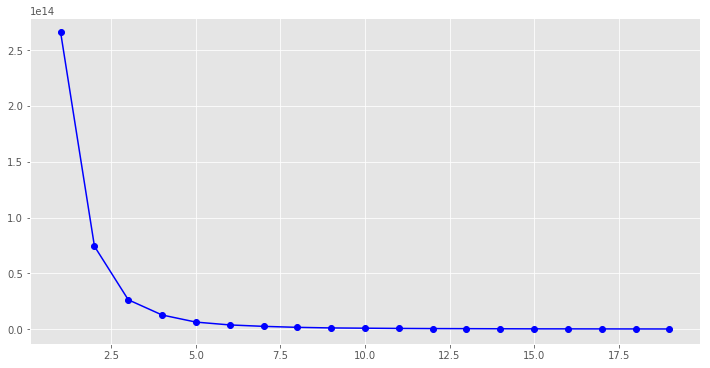

In [499]:
#Just for fun checking if there are any natural clusters using my wrapper function over kmeans
Use_Kmean_Clustering(df, 'Class', 'Class', plot_elbow=True)

In [500]:
#Looks like Duplicate Rows and Outliers are effecting clustering and Data in general

In [501]:
#Print Duplicate data
df[df.duplicated() == True]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [502]:
#REMOVGING  -- Drop Duplicates
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [503]:
df.shape

(690, 11)

In [504]:
#Deleting ID Coulmn as its not Necessary...
del(df['ID'])

In [505]:
#Checking Outliers -- 

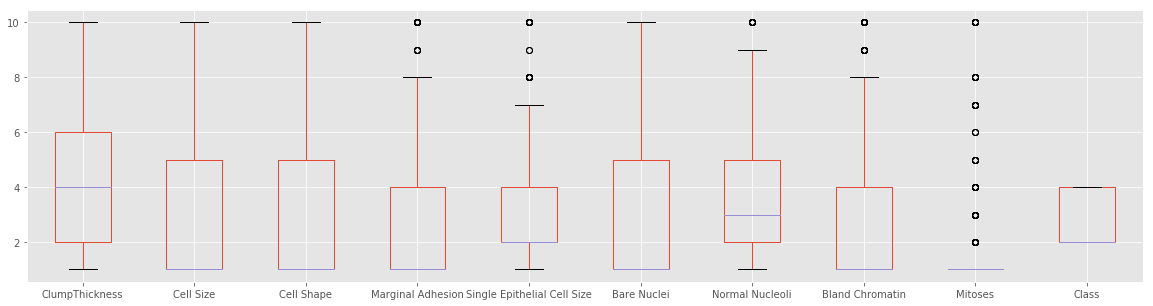

In [506]:
#This helps to Display Outliers
df.boxplot(figsize=(20,5))

In [507]:
df1 = df.copy()

In [508]:
#Print Outliers
#Other Way to Look at Outliers
for cols in df.columns:
  Q3 = df[cols].quantile(0.75)
  Q1 = df[cols].quantile(0.25)
  IQR = Q3-Q1
  print(f'{cols.capitalize()}')
  print(f'Number of rows with outliers: {len(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))])}')
  display(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))])

Clumpthickness
Number of rows with outliers: 0


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


Cell size
Number of rows with outliers: 0


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


Cell shape
Number of rows with outliers: 0


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


Marginal adhesion
Number of rows with outliers: 60


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
14,8,7,5,10,7,9,5,5,4,4
20,7,3,2,10,5,10,5,4,4,4
38,5,4,4,9,2,10,5,6,1,4
40,6,6,6,9,6,1,7,8,1,2
73,9,4,5,10,6,10,4,8,1,4
99,7,5,6,10,5,10,7,9,4,4
104,10,10,10,10,10,1,8,8,8,4
107,1,6,8,10,8,10,5,7,1,4
112,10,3,3,10,2,10,7,3,3,4
117,4,5,5,10,4,10,7,5,8,4


Single epithelial cell size
Number of rows with outliers: 52


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
32,10,7,7,3,8,5,7,4,3,4
42,6,10,10,2,8,10,7,3,3,4
43,5,6,5,6,10,1,3,1,1,4
44,10,10,10,4,8,1,8,10,1,4
53,5,5,5,8,10,8,7,3,7,4
54,10,5,5,6,8,8,7,1,1,4
62,9,10,10,1,10,8,3,3,1,4
67,5,3,4,1,8,10,4,9,1,4
71,6,10,2,8,10,2,7,8,10,4
84,3,5,7,8,8,9,7,10,7,4


Bare nuclei
Number of rows with outliers: 0


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


Normal nucleoli
Number of rows with outliers: 20


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
173,6,10,10,10,8,10,10,10,7,4
214,10,10,10,10,3,10,10,6,1,4
261,5,10,10,6,10,10,10,6,5,4
285,8,10,10,10,8,10,10,7,3,4
425,9,10,10,10,10,10,10,10,1,4
440,10,4,3,10,4,10,10,1,1,4
453,4,5,5,8,6,10,10,7,1,4
457,8,8,9,6,6,3,10,10,1,4
482,9,10,10,10,10,5,10,10,10,4
565,5,7,10,10,5,10,10,10,1,4


Bland chromatin
Number of rows with outliers: 77


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
21,10,5,5,3,6,7,7,10,1,4
36,10,10,10,8,6,1,8,9,1,4
44,10,10,10,4,8,1,8,10,1,4
52,10,3,6,2,3,5,4,10,2,4
56,8,10,10,1,3,6,3,9,1,4
60,5,3,5,5,3,3,4,10,1,4
63,6,3,4,1,5,2,3,9,1,4
67,5,3,4,1,8,10,4,9,1,4
68,8,3,8,3,4,9,8,9,8,4
84,3,5,7,8,8,9,7,10,7,4


Mitoses
Number of rows with outliers: 119


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
8,2,1,1,1,2,1,1,1,5,2
14,8,7,5,10,7,9,5,5,4,4
18,10,7,7,6,4,10,4,1,2,4
20,7,3,2,10,5,10,5,4,4,4
32,10,7,7,3,8,5,7,4,3,4
41,10,4,3,1,3,3,6,5,2,4
42,6,10,10,2,8,10,7,3,3,4
45,1,1,1,1,2,1,2,1,2,2
49,7,8,7,2,4,8,3,8,2,4
50,9,5,8,1,2,3,2,1,5,4


Class
Number of rows with outliers: 0


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [509]:
#Replace Outliers with (high-low) .....as replacing with mean might not be great as mean gets affected by outliers
#Compared to mode and median  (high-low) value is doing good in this scenario.......

In [510]:
#CODE TO REMOVE OUTLIERS
import math
for col in df.columns:
    if(col == 'Class'):
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    df.loc[((df[col] < low) | (df[col] > high)), col] = math.floor(high-low)

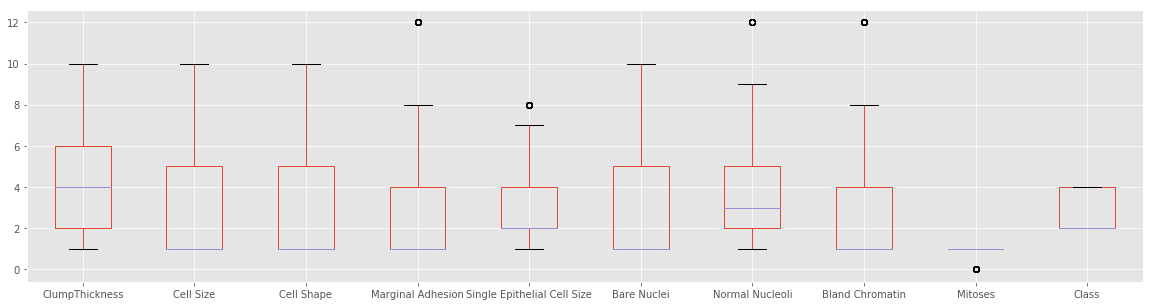

In [511]:
df.boxplot(figsize=(20,5))

In [512]:
#Checkign Clustering - Homogenity and Completeness again - after cleanign duplicates and outliers

Number of Clusters   : 2
Homogenity_Score     : 0.7018832351548566
Completeness_Score   : 0.713841029595837
V_Measure_Score      : 0.707811632129129
Adjusted_Rand_Score  : 0.8155558589801508
Adjusted_Mutual_Info : 0.7074788576408978
Silhouette_score     : 0.602784405239896


_________________________________________________________________________________
    Plotting Elbow Plot - Centroids on X-axis and Cluster Inertia on Y-Axis
_________________________________________________________________________________


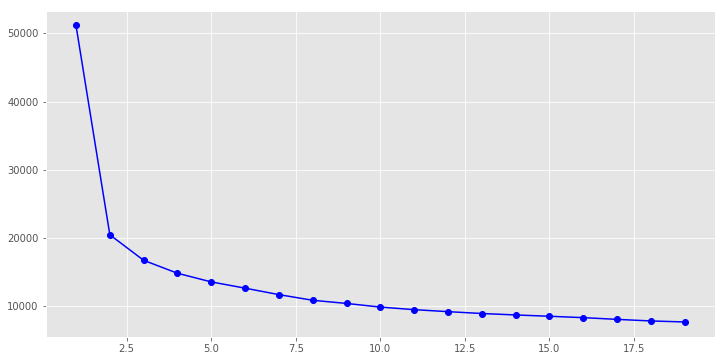

In [513]:
Use_Kmean_Clustering(df, 'Class', 'Class', plot_elbow=True)

In [514]:
###Very Clearly it Improved :).......Looks liek Data is good to Go ----Clustering is not part of  questions , Just presented
# as its Unsupervised Techniques Lab

In [515]:
#Question 4 and Question 5 ---- Performing Bi-Variant Analysis correaltion,pairplot etc - Remove Unwanted Columns etc

In [516]:
#Lets See a pair plot

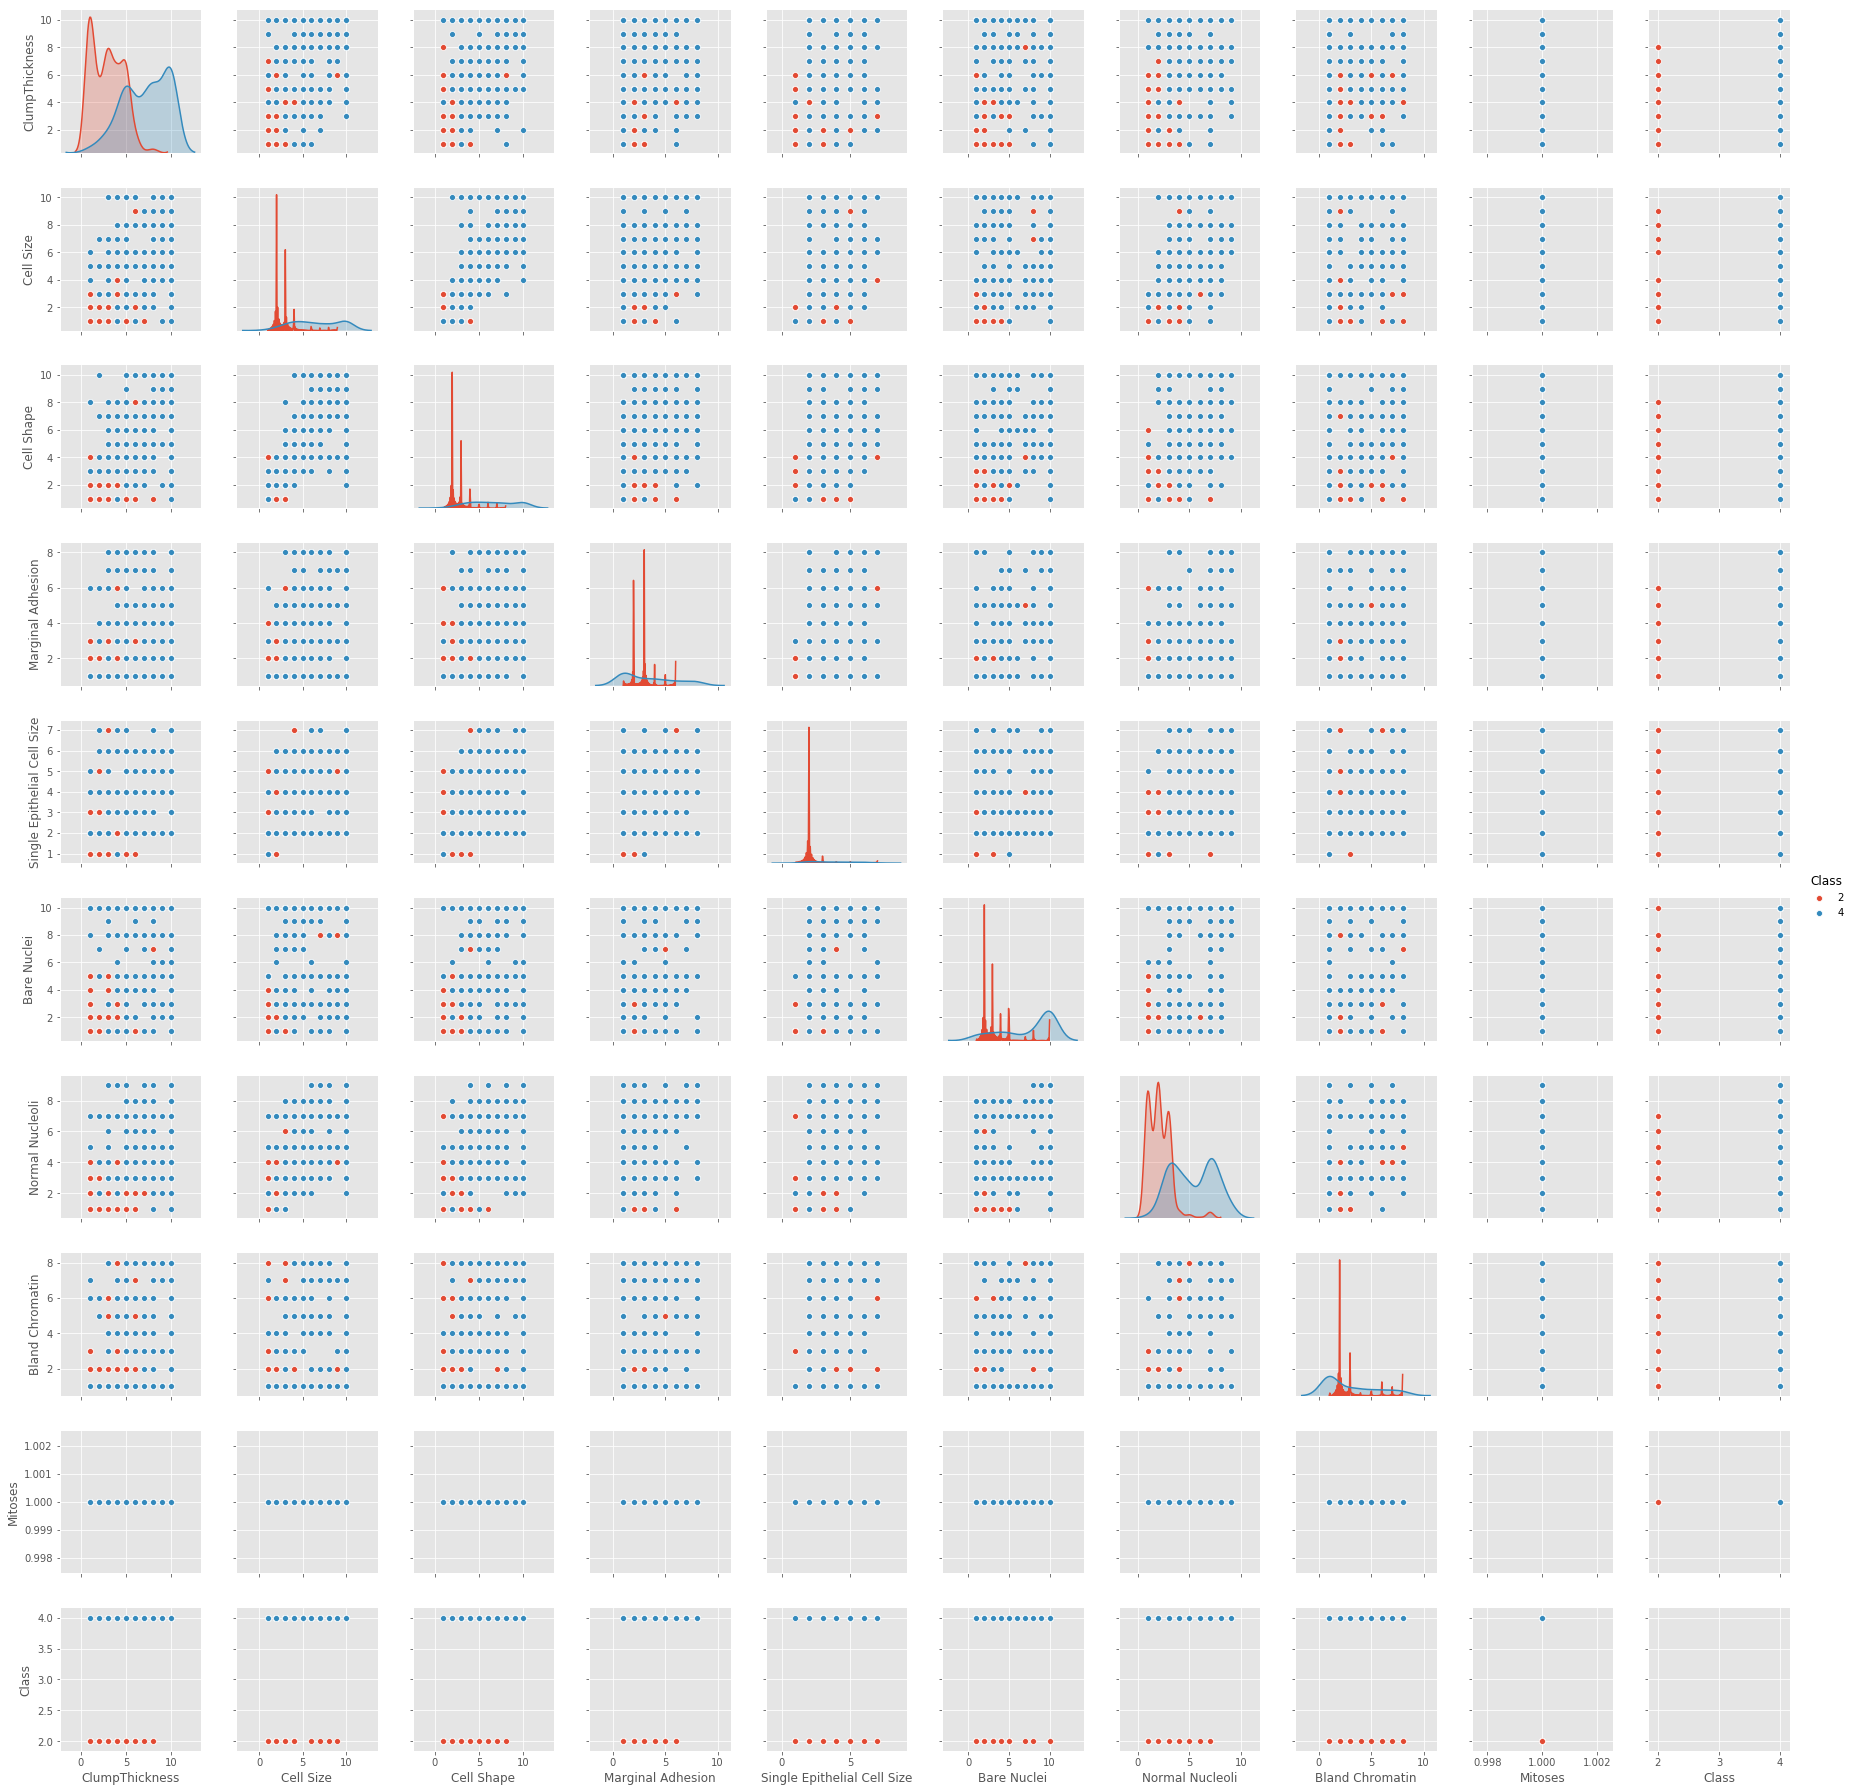

In [232]:
sns.pairplot(df, hue='Class')

In [517]:
#Distributions are Not much Overlaping and clearly Distinguishable with respect to 'Class'....so most of the variables are correlated to output column 'Class'

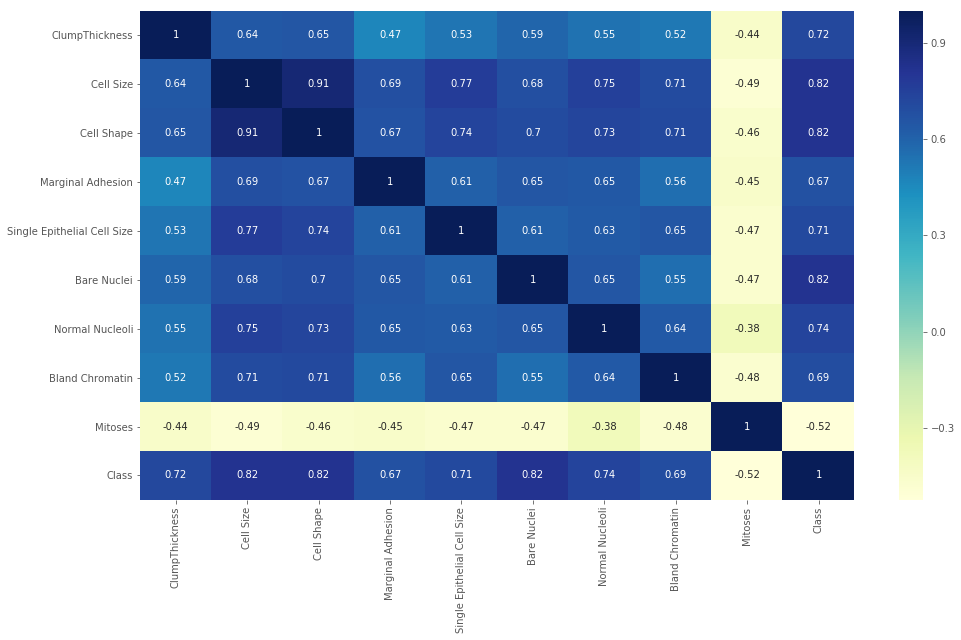

In [518]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [ ]:
#######################QUESTION 6 - PCA#######

In [ ]:
#Since from above PairPlot and Pearson Correlation we know that most of the indepedent variables are in correlation with
#each other -----So its wise to Apply the PCA and take principle components other than dropping the entire feature ......

In [519]:
X = df.drop('Class', axis=1)

In [520]:
Y = df['Class']

In [571]:
#Using Standard Scaler (can also Use ZScore) to standardize and finding covarience matrix
sc = StandardScaler()
X  =  sc.fit_transform(X.astype(float))          
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00145138  0.64410677  0.65453792  0.46728084  0.53358417  0.59150555
   0.54582395  0.5186142  -0.44343056]
 [ 0.64410677  1.00145138  0.9066632   0.68794757  0.76944771  0.68556472
   0.75332284  0.70804173 -0.49299528]
 [ 0.65453792  0.9066632   1.00145138  0.66889079  0.73850106  0.70518656
   0.73202574  0.71106272 -0.46444631]
 [ 0.46728084  0.68794757  0.66889079  1.00145138  0.60959438  0.64969736
   0.64665263  0.55585457 -0.44699519]
 [ 0.53358417  0.76944771  0.73850106  0.60959438  1.00145138  0.60892184
   0.6347241   0.65213697 -0.47021675]
 [ 0.59150555  0.68556472  0.70518656  0.64969736  0.60892184  1.00145138
   0.65267364  0.55446118 -0.46616061]
 [ 0.54582395  0.75332284  0.73202574  0.64665263  0.6347241   0.65267364
   1.00145138  0.63835237 -0.37784685]
 [ 0.5186142   0.70804173  0.71106272  0.55585457  0.65213697  0.55446118
   0.63835237  1.00145138 -0.47710431]
 [-0.44343056 -0.49299528 -0.46444631 -0.44699519 -0.47021675 -0.46616061
  

In [572]:
#Question 7 ------------------------Finding Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eigen_vectors)
print('\n Eigen Values \n', eigen_values)

Eigen Vectors 
 [[-0.30314063  0.14421287 -0.00896276 -0.8409661  -0.01673583  0.24757022
  -0.1245765  -0.32053674  0.01303356]
 [-0.37937587 -0.13385752 -0.73061003 -0.00895808  0.14241466 -0.46049174
   0.17325495 -0.09531263 -0.18124154]
 [-0.37585341 -0.15787979  0.66863449 -0.07660958  0.13022722 -0.58563687
   0.05928718 -0.0207436  -0.13035391]
 [-0.32449514 -0.10239632  0.0264079   0.40175982 -0.52875225  0.08768846
  -0.32629633 -0.5726714  -0.02048233]
 [-0.34204576 -0.05764843  0.07410135  0.18072489  0.28467377  0.50840687
   0.01574652  0.16500063 -0.68886791]
 [-0.33465804 -0.02214453 -0.07301228 -0.11959247 -0.52727027 -0.02762955
  -0.24343845  0.72552894  0.05872486]
 [-0.34095375 -0.30786662  0.06645002  0.06856312 -0.07024556  0.32289344
   0.6863071   0.0066867   0.44676103]
 [-0.32933396  0.00542559 -0.0404097   0.18944963  0.56362248  0.0952341
  -0.50185771  0.07826146  0.51890244]
 [ 0.25281458 -0.90953217 -0.03858559 -0.19457614  0.035243    0.0585311
  -0.249

In [573]:
#Small Check to find if the eigen_vectors and eigne_values are proper
# - Verifying  (A dot v = Lambda v) where (v - eignen_vector and Lambda eigen_values and A is covarience matrix)


if( (cov_matrix.dot(eigen_vectors[:,0]).all()) == (eigen_vectors[:,0].dot(eigen_values[0]).all())):
    print("Eigen Values and Eigen Vectors are Proper")
else:
    print("Eigen Value and Eigen Vectors are Incorrect")

Eigen Values and Eigen Vectors are Proper


In [560]:
#Question  8 - Finding Variance and Cumulative Varience by each Eignen Vector
total = sum(eigen_values)
variance_explained = [(i / total) for i in sorted(eigen_values, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(variance_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

In [561]:
####PRINTING EXPLAINED Varience 
print(variance_explained)

[0.6569903802480715, 0.07789336809711225, 0.061047145764705595, 0.05648195768737417, 0.040078752693593775, 0.035561537108314216, 0.033483687250390415, 0.028498405627625827, 0.009964765522812204]


In [562]:
#####PRINTING CUMULATIVE Variance
print(cum_var_exp)

[0.65699038 0.73488375 0.79593089 0.85241285 0.8924916  0.92805314
 0.96153683 0.99003523 1.        ]


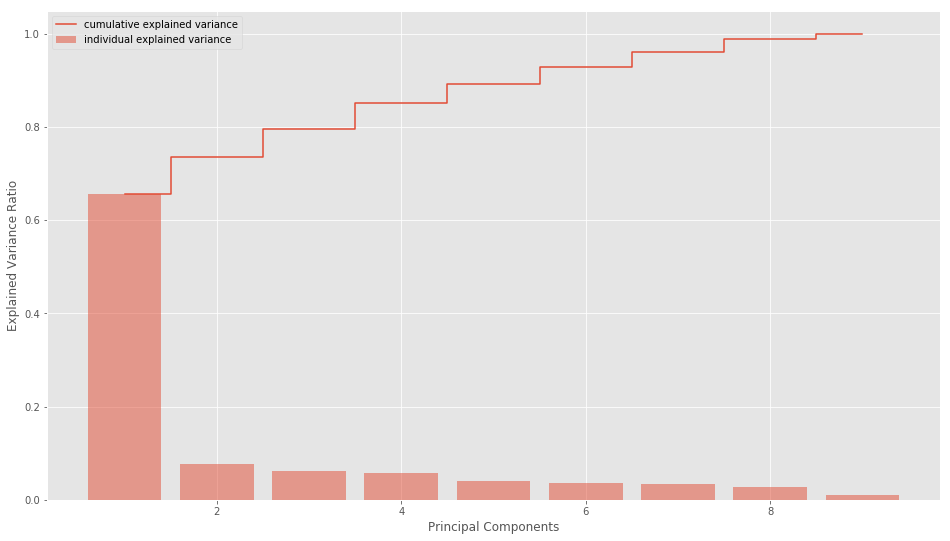

In [563]:
#Plotting Principle Components and Explained Variance 
plt.bar(range(1,eigen_values.size+1), variance_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigen_values.size+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.show()

In [564]:
#Question9 - Use PCA command from sklearn and find Principal Components and Transform data to components formed
#Taking 7 Principle Componens .....
pca = PCA(n_components = 7)

In [565]:
df_after_pca = pca.fit_transform(df)

In [566]:
df_after_pca.T

array([[-4.61952235,  4.39070488, -4.76648481, ..., 11.15335684,
         7.2352719 ,  8.16570223],
       [ 0.05867821, -4.78037206, -0.38828485, ...,  8.13947437,
         2.10278736, -0.05606012],
       [-1.24084043, -0.4943955 , -0.11397974, ...,  0.22668565,
         1.3488186 ,  1.44396728],
       ...,
       [-0.97932728,  0.75201793,  0.24576499, ...,  4.15962304,
         4.4224947 ,  5.48942534],
       [ 1.31907355, -2.2068649 ,  1.0103453 , ..., -0.24385022,
         5.54514438,  4.64326435],
       [ 0.24194678,  3.06716481,  0.14501614, ...,  0.06436098,
        -1.46495142, -1.25083471]])

In [567]:
#Principle Components
pca.components_

array([[ 2.82616414e-01,  3.85541118e-01,  3.74231713e-01,
         3.69765342e-01,  2.15341763e-01,  4.18270365e-01,
         2.99695817e-01,  4.10705279e-01, -2.86796916e-02,
         1.18613321e-01],
       [-5.77874874e-02,  8.69090871e-02,  7.50171256e-02,
        -3.38603671e-01,  7.06469311e-02, -5.62538040e-01,
         2.31474570e-04,  7.39193473e-01, -2.62344602e-03,
        -3.12000076e-02],
       [-6.67829776e-01, -3.54045254e-02, -9.28676846e-02,
         6.90800671e-01,  2.66708559e-02, -2.08798857e-01,
         7.87439849e-02,  1.13894313e-01,  5.09493883e-03,
        -5.84221812e-02],
       [ 3.58017064e-01,  3.27017841e-01,  2.46863630e-01,
         2.52311674e-01,  8.36986758e-02, -6.61883750e-01,
         8.73548131e-02, -4.32525036e-01,  6.36388061e-03,
        -2.08672980e-02],
       [-5.68525088e-01,  3.89173059e-01,  3.56674111e-01,
        -4.48475300e-01,  1.54969796e-01,  8.80420928e-02,
         2.93806527e-01, -2.79522917e-01,  2.73379162e-02,
         2.

In [568]:
############QUESTION 10 -----------Finding Correlation between Principle Components and Features

In [569]:
map1 = pd.DataFrame(pca.components_, columns=list(df.columns))

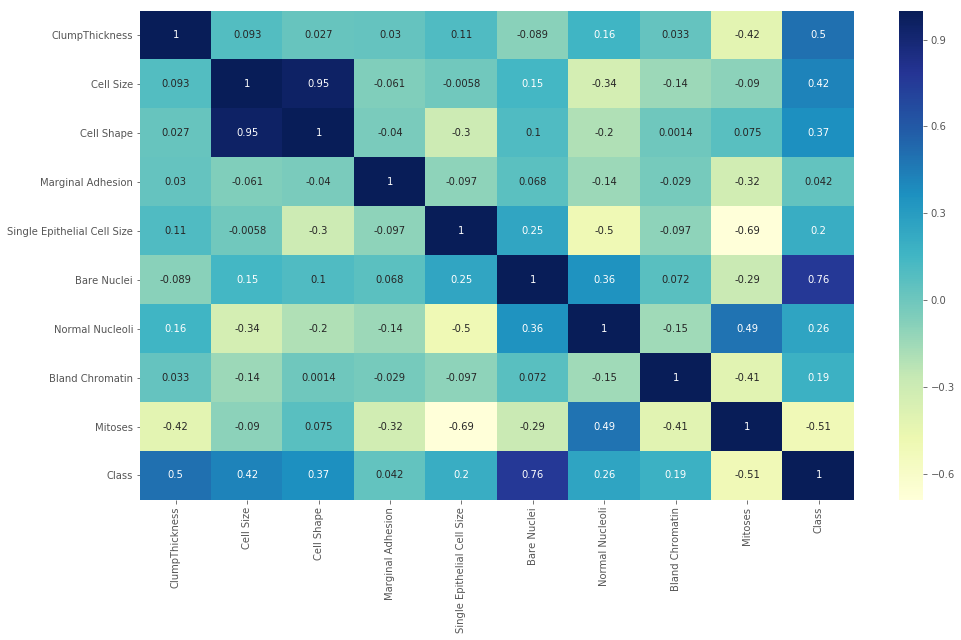

In [570]:
sns.heatmap(map1.corr(), annot=True,cmap="YlGnBu")

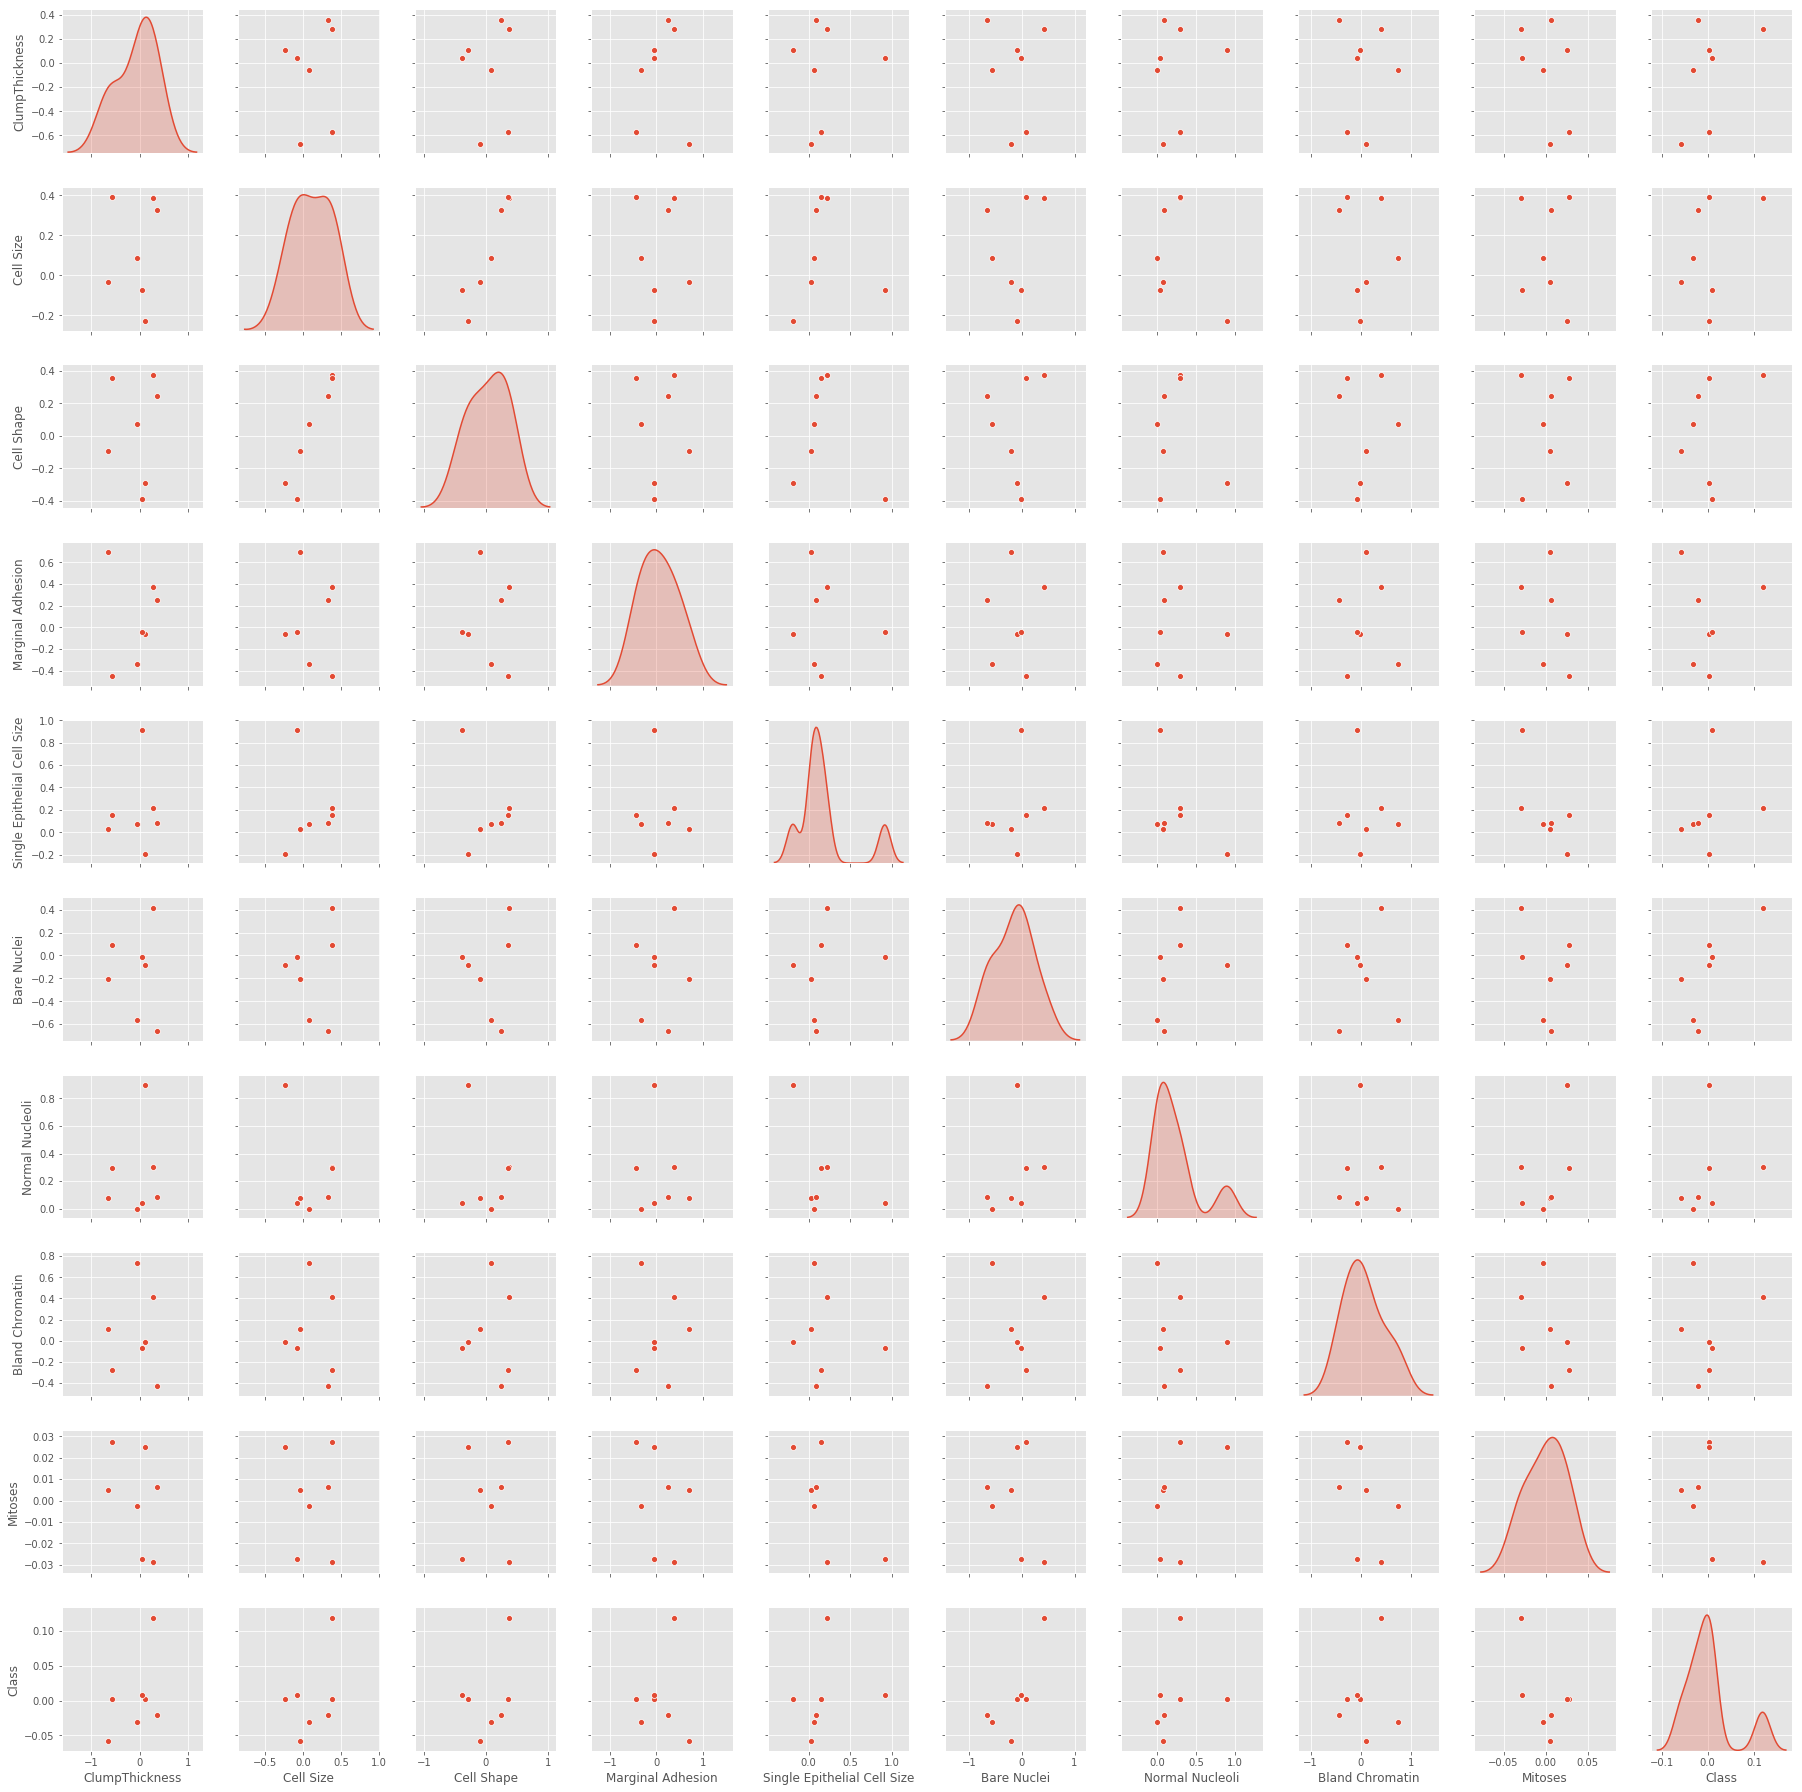

In [580]:
sns.pairplot(map1, diag_kind='kde')